In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.optimize import line_search
#%matplotlib notebook

## Домашнее задание
### 1. Нелинейная регрессия

Дан набор точек. Реализуйте какой-нибудь алгоритм нелинейной регрессии для моделей из семейства функций:

$$
\check{y}=w_1 \cdot x^{w_2}+w_3 \cdot x^{w_4}
$$

Нормируйте данные, найдите наилучшие коэффициенты, удостоверьтесь, что нет переобучения.

In [2]:
x=[0.1,0.10808081,0.11616162,0.12424242,0.13232323,0.14040404,
   0.14848485,0.15656566,0.16464646,0.17272727,0.18080808,
   0.18888889,0.1969697,0.20505051,0.21313131,0.22121212,
   0.22929293,0.23737374,0.24545455,0.25353535,0.26161616,
   0.26969697,0.27777778,0.28585859,0.29393939,0.3020202,
   0.31010101,0.31818182,0.32626263,0.33434343,0.34242424,
   0.35050505,0.35858586,0.36666667,0.37474747,0.38282828,
   0.39090909,0.3989899,0.40707071,0.41515152,0.42323232,
   0.43131313,0.43939394,0.44747475,0.45555556,0.46363636,
   0.47171717,0.47979798,0.48787879,0.4959596,0.5040404,
   0.51212121,0.52020202,0.52828283,0.53636364,0.54444444,
   0.55252525,0.56060606,0.56868687,0.57676768,0.58484848,
   0.59292929,0.6010101,0.60909091,0.61717172,0.62525253,
   0.63333333,0.64141414,0.64949495,0.65757576,0.66565657,
   0.67373737,0.68181818,0.68989899,0.6979798,0.70606061,
   0.71414141,0.72222222,0.73030303,0.73838384,0.74646465,
   0.75454545,0.76262626,0.77070707,0.77878788,0.78686869,
   0.79494949,0.8030303,0.81111111,0.81919192,0.82727273,
   0.83535354,0.84343434,0.85151515,0.85959596,0.86767677,
   0.87575758,0.88383838,0.89191919,0.9]

y = [-2.24812911, -2.30215341, -2.34463875, -2.38651064,
     -2.43190693, -2.44713884, -2.49003176, -2.51006098,
     -2.55831541, -2.57056931, -2.59340317, -2.64026441,
     -2.65975636, -2.69517476, -2.71046599, -2.74422696,
     -2.76251291, -2.79505506, -2.79301352, -2.82852207,
     -2.854651, -2.88654236, -2.92345136, -2.91943321,
     -2.94240833, -2.9487781, -2.97926813, -2.99198343,
     -3.03396292, -3.03814694, -3.04944858, -3.07196161,
     -3.09883706, -3.11338258, -3.11898122, -3.14254571,
     -3.18330957, -3.17453301, -3.20021237, -3.21213539,
     -3.23715191, -3.24017664, -3.23640684, -3.26147762,
     -3.28208909, -3.29453546, -3.31160478, -3.33188752,
     -3.33320305, -3.35238927, -3.34176317, -3.37471911,
     -3.37543159, -3.40452694, -3.40505804, -3.43358858,
     -3.43596139, -3.43705603, -3.45264647, -3.46029402,
     -3.45723979, -3.4720453, -3.47597438, -3.4795529,
     -3.50118552, -3.5031452, -3.5097196, -3.51083668,
     -3.51128397, -3.52708836, -3.5222885, -3.53317295,
     -3.50965143, -3.51939652, -3.51659198, -3.50734187,
     -3.50882329, -3.48129755, -3.49384658, -3.48813707,
     -3.48345018, -3.46180698, -3.44784696, -3.42372263,
     -3.39080674, -3.37867045, -3.35281766, -3.32575498,
     -3.28934964, -3.26814804, -3.23547615, -3.1707224,
     -3.12910072, -3.09300443, -3.02523152, -2.9453774,
     -2.89454317, -2.83662685, -2.75433056, -2.68946573]

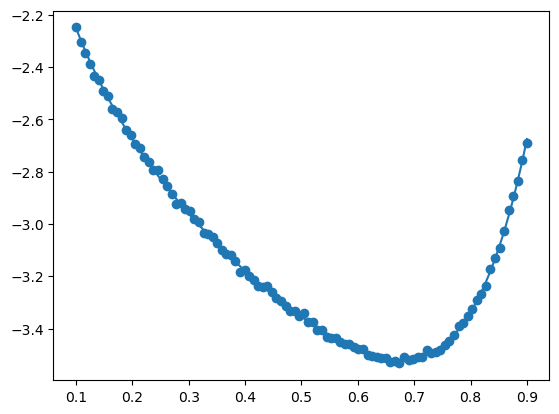

In [3]:
x_mean = np.mean(x)
y_mean = np.mean(y)
x_norm = np.array((x - x_mean) / abs(np.max(x)))
y_norm = np.array((y - y_mean) / abs(np.max(y)))


def model_func(x, w1, w2, w3, w4):
    return w1 * x**(w2) + w3 * x**(w4)

def RMSE(params, x, y_true):
    w1, w2, w3, w4 = params
    y_pred = model_func(x, w1, w2, w3, w4)
    return np.sqrt(np.mean((y_true - y_pred)**2))

initial_guess = [-1,-2,3,4]
result = minimize(RMSE, initial_guess, args=(x, y),
                  method='BFGS')
w = result.x

x_pred = np.linspace(min(x), max(x), 300)
plt.scatter(x, y)
plt.plot(x_pred, model_func(x_pred, w[0], w[1], w[2], w[3]))
plt.show()

### 2. Американские горки

Реализуя ручками методы дихотомии и Фиббоначи (золотого сечения), найти точку локального минимума функций (любых двух из _а-ж_ на ваш выбор):

a) $f(x)=2 x^2-\ln x$

б) $f(t)=t^3 / 3+t^2$

в) $f(t)=t^4 / 4-2 t^2$

г) $f(t)=t e^{-t^2 / 2}$

д) $f(t)=3 t^4-8 t^3+6 t^2$

e) $f(t)=(t-5) e^t$

ж) $f(t)=\left(t^2-3\right) /(t+2)$.

In [4]:
def fibonacci_sequence(n):
    if n <= 0:
        return np.array([], dtype=int)
    elif n == 1:
        return np.array([1], dtype=int)

    fib = np.zeros(n, dtype=int)
    fib[0] = 1
    fib[1] = 1

    for i in range(2, n):
        fib[i] = fib[i-1] + fib[i-2]

    return fib

def root_fib(function, x, max_iter):
    a, b = x[0], x[-1]

    fib_seq = fibonacci_sequence(max_iter + 2)

    x_1 = a + (b - a) * fib_seq[max_iter-2] / fib_seq[max_iter]
    x_2 = a + (b - a) * fib_seq[max_iter-1] / fib_seq[max_iter]

    f_1, f_2 = function(x_1), function(x_2)

    for i in range(max_iter):
        k = max_iter - i - 1

        if f_1 > f_2:
            a = x_1
            x_1 = x_2
            x_2 = b - (x_1 - a)
            f_1 = f_2
            f_2 = function(x_2)
        else:
            b = x_2
            x_2 = x_1
            x_1 = a + (b - x_2)
            f_2 = f_1
            f_1 = function(x_1)

    return (a + b) / 2

def dichotomy_method(function, x, max_iter, epsilon=1e-8):

    a, b = x[0], x[-1]

    for i in range(max_iter):
        mid = (a + b) / 2
        x1 = mid - epsilon
        x2 = mid + epsilon

        f1 = function(x1)
        f2 = function(x2)
        if f1 < f2:
            b = x2
        else:
            a = x1

    return (a + b) / 2

def derivative(function):
    h = 1e-8

    def df(x):
        return (function(x + h) - function(x - h)) / (2 * h)

    return df

def find_minimas(function, x, max_iter, n_splits, method='fibonacci'):

    intervals = np.array_split(x, n_splits)
    roots = []

    for interval in intervals:
        if method == 'fibonacci':
            root = root_fib(function, interval, max_iter)
        elif method == 'dichotomy':
            root = dichotomy_method(function, interval, max_iter)

        if (np.round(root, 3) not in roots) and (np.round(root, 3) not in [np.round(interval[0], 3), np.round(interval[-1], 3)]):
            roots.append(np.round(root, 3))

    minimas = np.array(roots)
    return minimas


x = np.linspace(-10, 10, 1000000)

functions = [lambda x: 2*x**2 - np.log(x),
             lambda x: x**3 / 3 + x**2,
             lambda x: x**4/4 + 2*x**2,
             lambda x: x*np.exp(-x**2/2),
             lambda x: 3*x**4 - 8*x**3 + 6*x**2,
             lambda x: (x - 5)*np.exp(x),
             lambda x: (x**2 - 3) / (x + 2)]

for i, function in enumerate(functions):

    minimas = find_minimas(function, x, 50, 13, method='fibonacci')
    print(f'Для функции {i} минимум по фибоначчи в x={minimas}')

minimas = []
for i, function in enumerate(functions):

    minimas = find_minimas(function, x, 50, 13, method='dichotomy')
    print(f'Для функции {i} минимум дихотомией в x={minimas}')

Для функции 0 минимум по фибоначчи в x=[]
Для функции 1 минимум по фибоначчи в x=[-0.]
Для функции 2 минимум по фибоначчи в x=[-0.]
Для функции 3 минимум по фибоначчи в x=[-1.]
Для функции 4 минимум по фибоначчи в x=[-0.]
Для функции 5 минимум по фибоначчи в x=[4.]
Для функции 6 минимум по фибоначчи в x=[-1.]
Для функции 0 минимум дихотомией в x=[0.5]
Для функции 1 минимум дихотомией в x=[0.]
Для функции 2 минимум дихотомией в x=[0.]
Для функции 3 минимум дихотомией в x=[-1.]
Для функции 4 минимум дихотомией в x=[0.]
Для функции 5 минимум дихотомией в x=[4.]
Для функции 6 минимум дихотомией в x=[-1.]


/tmp/ipykernel_120980/3924445244.py:90: RuntimeWarning: invalid value encountered in log
  functions = [lambda x: 2*x**2 - np.log(x),


### 3. Функция Растригина.

$$
f\left(x_1, x_2\right)=20+x_1^2+x_2^2-10 \cos \left(2 \pi x_1\right)-10 \cos \left(2 \pi x_2\right)
$$

Постройте множество локальных минимумов и максимумов на плоскости используя `minimize`. Минимумы должны быть синими, максимумы - красными. В 3D график функции выглядит примерно так:

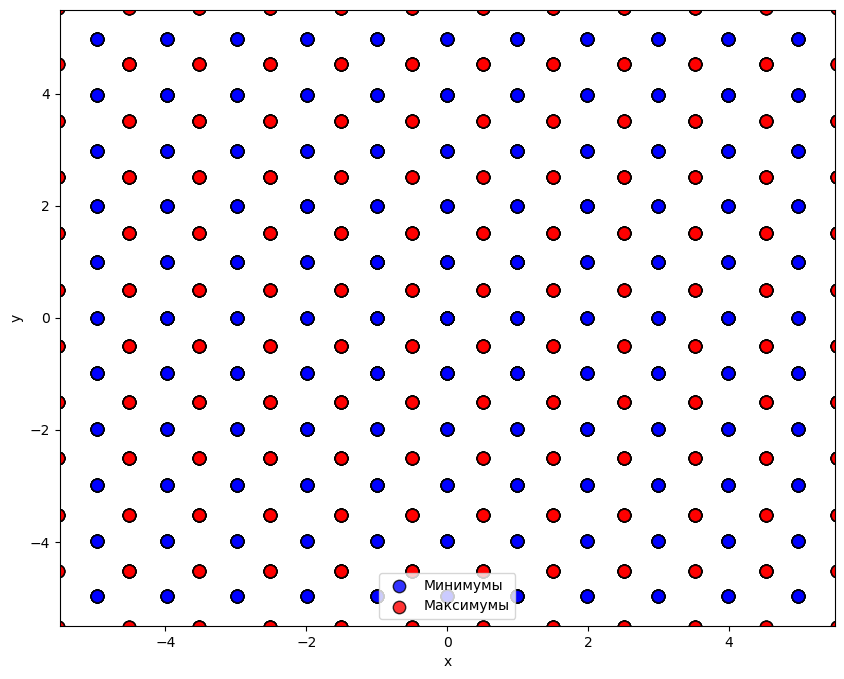

In [5]:
def f(params):
    x, y = params
    return 20 + x**2 + y**2 - 10*np.cos(2*np.pi*x) - 10*np.cos(2*np.pi*y)

def find_extrema_strict(_type='minima'):
    extrema = []

    if _type == 'minima':
        func = f
    elif _type == 'maxima':
        func = lambda params: -f(params)

    x_grid = np.linspace(-5.5, 5.5, 50)
    y_grid = np.linspace(-5.5, 5.5, 50)

    for x in x_grid:
        for y in y_grid:
            x0 = [x, y]
            result = minimize(func, x0, method='BFGS', tol=1e-12)
            current_extr = result.x
            extrema.append(tuple(current_extr))

    return extrema

minima = find_extrema_strict(_type='minima')
maxima = find_extrema_strict(_type='maxima')

plt.figure(figsize=(10, 8))

minima_x = [pos[0] for pos in minima]
minima_y = [pos[1] for pos in minima]
plt.scatter(minima_x, minima_y, c='blue', s=80, alpha=0.8,
           edgecolors='black', linewidth=1, label='Минимумы')

maxima_x = [pos[0] for pos in maxima]
maxima_y = [pos[1] for pos in maxima]
plt.scatter(maxima_x, maxima_y, c='red', s=80, alpha=0.8,
           edgecolors='black', linewidth=1, label='Максимумы')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(-5.5, 5.5)
plt.ylim(-5.5, 5.5)
plt.show()

### 4. Градиенты градиентами

На этих рисунках изображены траектории движения в точку минимума методами сопряжённых градиентов и наискорейшего спуска:

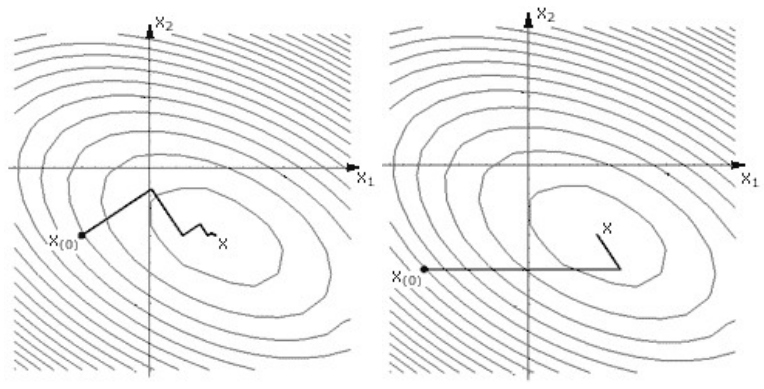

Определите, на каком из них какой из этих двух методов проиллюстрирован.  Ответ аргументируйте. Что изображают замкнутые линии? Докажите(*), что один из этих двух методов (какой?) позволяет решать квадратичные задачи за конечное число шагов. Каково максимально возможное количество этих шагов для матрицы размера n?


На первой наискорейший спуск, на втором сопряженные градиенты, ибо шаги первого строго ортогональны линиям уровня

### 5. Овальный

Градиентный метод сходится достаточно быстро, если для минимизируемой функции f (x) поверхности уровня близки к сферам (при n = 2 – к окружностям). Если же линии уровня сильно вытянуты в каком-то направлении, то по нормали к этому направлению целевая функция меняется значительно быстрее, чем вдоль направления. Такой характер целевой функции называется овражным. Исходя из рисунка, объясните, почему в этих случаях градиентный метод сходится хуже.

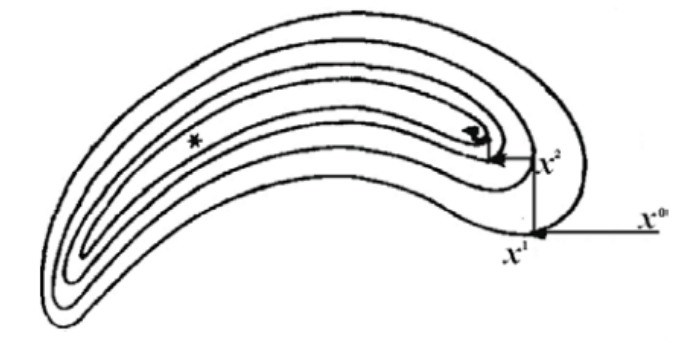

Как связан овражный характер функции с величиной наименьшего сингулярного числа матрицы квадратичной формы? А с величиной числа обусловленности матрицы?

На рисунке ниже изображена работа метода покоординатного спуска (поочередно минимизируем функцию вдоль каждой координаты однопараметрическим методом - совсем убого, поэтому не выдавали) для функций овражного характера. Какой вывод можно сделать из этого рисунка?

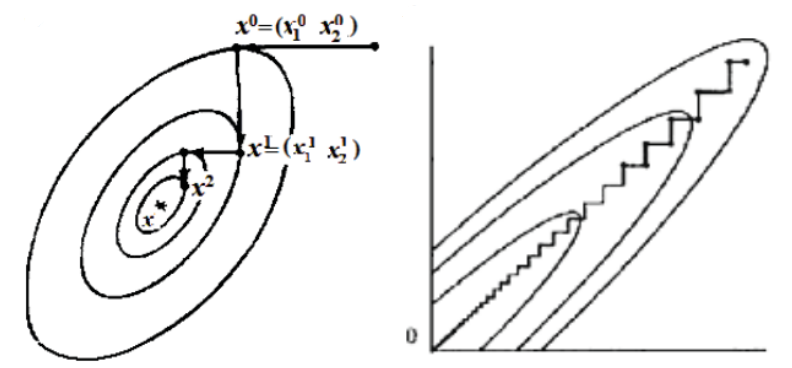

Потому что градиент указывает строго ортогонально линиям уровня, а в таком случае на каждом шаге исправляется только какая-то малая проекция ошибки $(\vec{x_n} - \vec{x^*}, - \vec{\nabla}f) \propto \varepsilon$


В "вытянутых множествах" значение функции вдоль одной из локальных координат меняется значительно быстрее, чем вдоль других, т.е. линии уровня можно задать n-1 переменной и 1 квазисвободным параметром, т.е. линеаризованная матрица близка к вырожденной. $\sigma_i \rightarrow 0, \ \lambda_i \rightarrow 0, \ \nu \rightarrow \infty$


Из рисунка можно увидеть одну из причин, почему такой спуск плох и не адаптивен к множеству вообще нисколько, в отличие от других спусков. В нормальных координатах пкф около минимума может и работает, но если глобально у функции поведение другое, то метод тоже плох.

### 6. Сопрягаемся (полузвёздочка)

Рассмотрим на примере функции Стайблински-Танга поведение различных вариантов метода сопряженных градиентов. Функция задается выражением
$$
f(x)=\frac{1}{2} \sum_{i=1}^n x_i^4-16 x_i^2+5 x_i .
$$
Глобальным минимум достигается в точке $(\eta, \ldots, \eta)$, где $\eta \approx-2.904$. Использовать данную функцию будем при $n=2$, чтобы наглядно проиллюстрировать результаты.

Напишите все 7 вариантов __(*, если не на доп. быллы, то возьмите 2 из алгоритма)__ реализации метода сопряженных градиентов из семинара. Сравните результаты. Функция специально подобрана таким образом, что некоторые из вариантов реализации ответ не смогут получить, а остальные продемонстрируют разное качество работы.

Качество измерьте как количество итераций, необходимое для получения точности

$$
\left\|r\right\|<10^{-6}
$$

Пусть метод останавливается на итерации $k$, если выполняется условие $\left\|r_k\right\|<10^{-6}$, или по истечению 1000 итераций.

Начальные приближения берите следующие:

(0.1, -1)

(0.1, -1.1)

(0, -1)


--- Starting Point: (0.1, -1.1) ---
HS: Converged in 10 iters. Final f(x)=-78.3323
FR: Converged in 176 iters. Final f(x)=-78.3323
PR: Converged in 11 iters. Final f(x)=-64.1956


/tmp/ipykernel_120980/2402353426.py:23: LineSearchWarning: The line search algorithm did not converge
  alpha = line_search(styblinski_tang, styblinski_tang_grad, x, d)[0]


CD: Stopped in 1000 iters. Final f(x)=-78.3323
LS: Converged in 14 iters. Final f(x)=-78.3323
DY: Converged in 902 iters. Final f(x)=-78.3323
HZ: Converged in 10 iters. Final f(x)=-78.3323


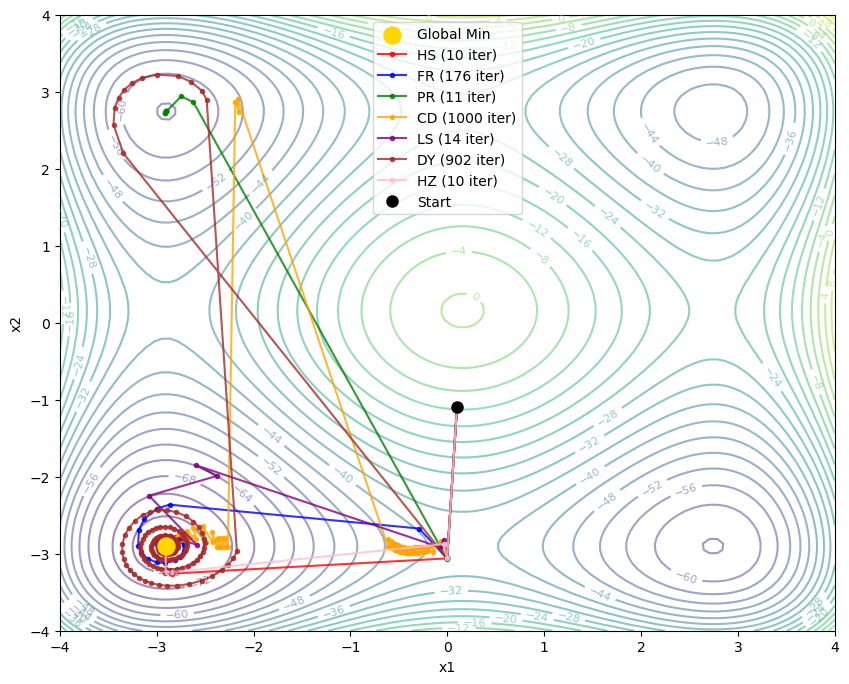


--- Starting Point: (0, -1) ---
HS: Converged in 11 iters. Final f(x)=-78.3323
FR: Converged in 20 iters. Final f(x)=-78.3323
PR: Converged in 11 iters. Final f(x)=-78.3323
CD: Converged in 60 iters. Final f(x)=-78.3323
LS: Converged in 15 iters. Final f(x)=-64.1956
DY: Converged in 16 iters. Final f(x)=-78.3323
HZ: Converged in 11 iters. Final f(x)=-78.3323


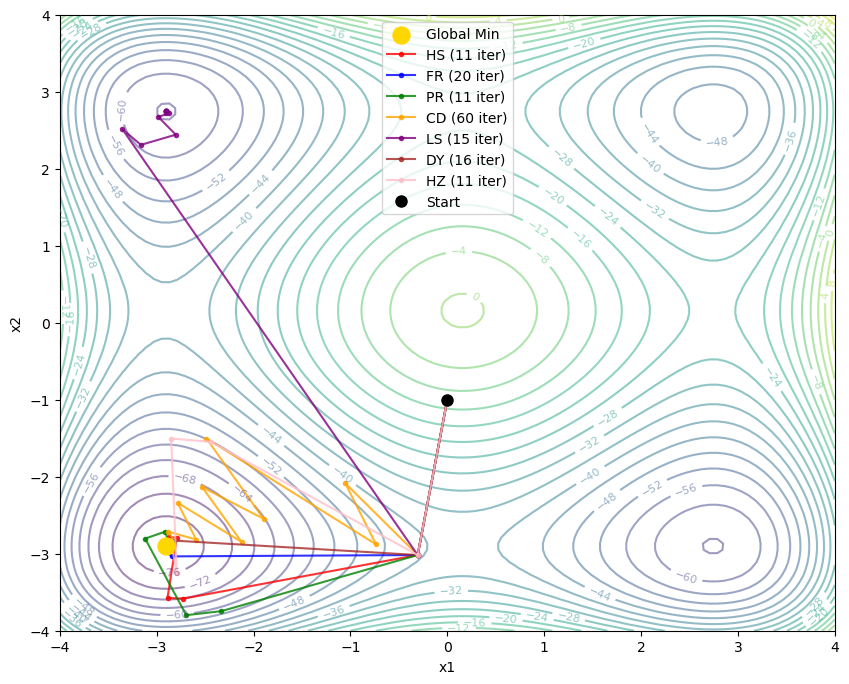

In [6]:
def styblinski_tang(x):
    x0, x1 = x
    return 0.5 * (x0**4 - 16*x0**2 + 5*x0 + x1**4 - 16*x1**2 + 5*x1)

def styblinski_tang_grad(x):
    x0, x1 = x
    grad_x0 = 0.5 * (4*x0**3 - 32*x0 + 5)
    grad_x1 = 0.5 * (4*x1**3 - 32*x1 + 5)
    return np.array([grad_x0, grad_x1])

def conjugate_gradient(x0, method='HS', max_iter=1000, tol=1e-6):
    x = x0.copy()
    g = styblinski_tang_grad(x)
    d = -g

    history = [x.copy()]
    k = 0
    while np.linalg.norm(g) > tol and k < max_iter:

        if np.linalg.norm(g) > 1e10:
            print(f"Method {method} diverged at iteration {k}")
            break
        alpha = line_search(styblinski_tang, styblinski_tang_grad, x, d)[0]

        if alpha is None:
            alpha = 0.001

        x_new = x + alpha * d
        g_new = styblinski_tang_grad(x_new)
        y = g_new - g
        denom_epsilon = 1e-10

        if method == 'HS': # Hestenes-Stiefel
            num = np.dot(g_new, y)
            den = np.dot(d, y)
            beta = num / den if abs(den) > denom_epsilon else 0

        elif method == 'FR': # Fletcher-Reeves
            num = np.dot(g_new, g_new)
            den = np.dot(g, g)
            beta = num / den if abs(den) > denom_epsilon else 0

        elif method == 'PR': # Polak-Ribiere
            num = np.dot(g_new, y)
            den = np.dot(g, g)
            beta = num / den if abs(den) > denom_epsilon else 0

        elif method == 'CD': # Conjugate Descent
            num = np.dot(g_new, g_new)
            den = -np.dot(d, g)
            beta = -num / den if abs(den) > denom_epsilon else 0

        elif method == 'LS': # Liu-Storey
            num = np.dot(g_new, y)
            den = -np.dot(d, g)
            beta = -num / den if abs(den) > denom_epsilon else 0

        elif method == 'DY': # Dai-Yuan
            num = np.dot(g_new, g_new)
            den = np.dot(d, y)
            beta = num / den if abs(den) > denom_epsilon else 0

        elif method == 'HZ': # Hager-Zhang
            den = np.dot(d, y)
            if abs(den) < denom_epsilon:
                beta = 0
            else:
                y_norm_sq = np.dot(y, y)
                term = y - 2 * d * (y_norm_sq / den)
                beta = np.dot(term, g_new) / den

        else:
            raise ValueError(f"Unknown method: {method}")

        d_new = -g_new + beta * d

        x = x_new
        g = g_new
        d = d_new

        history.append(x.copy())
        k += 1

    return np.array(history), k

methods = ['HS', 'FR', 'PR', 'CD', 'LS', 'DY', 'HZ']
start_points = [
#    (0.1, -1),
    (0.1, -1.1),
    (0, -1)
]
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

x_range = np.linspace(-4, 4, 100)
y_range = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = styblinski_tang([X[i, j], Y[i, j]])
for idx, start_point in enumerate(start_points):
    print(f"\n--- Starting Point: {start_point} ---")

    plt.figure(figsize=(10, 8))
    contour = plt.contour(X, Y, Z, levels=30, alpha=0.5, cmap='viridis')
    plt.clabel(contour, inline=True, fontsize=8)

    plt.scatter([-2.903534], [-2.903534], s=150, c='gold', label='Global Min', zorder=10)

    for i, method in enumerate(methods):
        x0 = np.array(start_point, dtype=float)
        history, iterations = conjugate_gradient(x0, method=method)

        final_val = styblinski_tang(history[-1])
        success = np.linalg.norm(styblinski_tang_grad(history[-1])) < 1e-6

        status = "Converged" if success else "Stopped"
        print(f"{method}: {status} in {iterations} iters. Final f(x)={final_val:.4f}")
        plt.plot(history[:, 0], history[:, 1], 'o-', color=colors[i],
                 markersize=3, linewidth=1.5, alpha=0.8,
                 label=f'{method} ({iterations} iter)')

    plt.plot(start_point[0], start_point[1], 'ko', markersize=8, label='Start', zorder=10)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

### 7.* Сопрягаемся на максималках

Покажите экспериментально, что метод сопряженных градиентов работает во много раз лучше на случайных положительно определенных квадратичных формах. Можно использовать встроенные минимизаторы.